# Setup

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/n.nafisi17/Downloads/Python/grocery-sales')

print(os.getcwd())

/Users/n.nafisi17/Downloads/Python/grocery-sales


# Framing

In [41]:
#Objective:

print("\n--- Objective ---\n")

print("This analysis aims to uncover sale patterns and trends from January 2012 to June 2014 to help the grocery company optimize marketing, supply chain, and product placement strategies.")

print("Key Business Questions:")
print("1.Which cities generate the highest sales and profit?")
print("2.Which products sell the most in each city?")
print("3.Are there cities where neither overall sales nor product-specific sales justify continued supply?")
print("Hypothesis:")
print("Cities with strong total sales should be the primary marketing focus.")
print("If a city has high sales due to only a few products, those specific products should be prioritized in supply and marketing.")
print("Cities with both low overall sales and no standout products should be deprioritized for supply chain efficiency.")


--- Objective ---

This analysis aims to uncover sale patterns and trends from January 2012 to June 2014 to help the grocery company optimize marketing, supply chain, and product placement strategies.
Key Business Questions:
1.Which cities generate the highest sales and profit?
2.Which products sell the most in each city?
3.Are there cities where neither overall sales nor product-specific sales justify continued supply?
Hypothesis:
Cities with strong total sales should be the primary marketing focus.
If a city has high sales due to only a few products, those specific products should be prioritized in supply and marketing.
Cities with both low overall sales and no standout products should be deprioritized for supply chain efficiency.


# Extraction

In [42]:
# Load Data
file_names = ["cities.csv", "customers.csv", "item_master.csv", "sales_rep.csv", "sales.csv"]

# Handling encoding issues within the csv files

encoding_format = 'latin1'

# Creating a dictionary to store DataFrames

dfs = {file: pd.read_csv(file, encoding=encoding_format) for file in file_names}

# Assigning DataFrames to variables for easy access

cities = dfs["cities.csv"]
customers = dfs["customers.csv"]
item_master = dfs["item_master.csv"]
sales_rep = dfs["sales_rep.csv"]
sales = dfs["sales.csv"]

# Confirming data is loaded

for name, df in dfs.items():
    print(f"{name}: {df.shape}")  # Prints number of rows and columns

cities.csv: (100, 6)
customers.csv: (684, 3)
item_master.csv: (827, 5)
sales_rep.csv: (64, 8)
sales.csv: (96466, 15)


# Wrangling

In [46]:
# --- Data Cleaning ---

# Check for missing values
print("Missing Values Before Cleaning:")
print(sales.isna().sum())

# Convert 'Sales' column to numeric
sales['Sales'] = pd.to_numeric(sales['Sales'], errors='coerce')

# Drop rows where Sales is NaN (likely errors in data entry)
sales = sales.dropna(subset=['Sales'])

# Merge DataFrames
sales_customers = sales.merge(customers, on='Customer Number', how='left')
sales_cities = sales_customers.merge(cities, on='City Code', how='left')
sales_final = sales_cities.merge(item_master, on='Item Number', how='left')

# Check merged data
print("Merged Data Sample:")
print(sales_final.head())

Missing Values Before Cleaning:
%KEY                      0
Cost                      0
Customer Number           0
Date                      0
GrossSales                0
Invoice Date              0
Invoice Number            0
Item Desc                 0
Item Number               0
Margin                    0
Order Number              0
Promised Delivery Date    0
Sales                     0
Sales Qty                 0
Sales Rep Number          0
dtype: int64
Merged Data Sample:
   %KEY    Cost  Customer Number       Date  GrossSales Invoice Date  \
0  3428 -513.15         10012226  1/12/2012   -573.3835    1/12/2012   
1  3429 -105.93         10012226  1/12/2012   -204.6638    1/12/2012   
2  3430  -88.07         10012226  1/12/2012   -165.8016    1/12/2012   
3  3431  -43.12         10012226  1/12/2012   -118.3703    1/12/2012   
4  3432  -37.98         10012226  1/12/2012   -102.3319    1/12/2012   

   Invoice Number                   Item Desc  Item Number  Margin  ...  \
0      

# Analysis

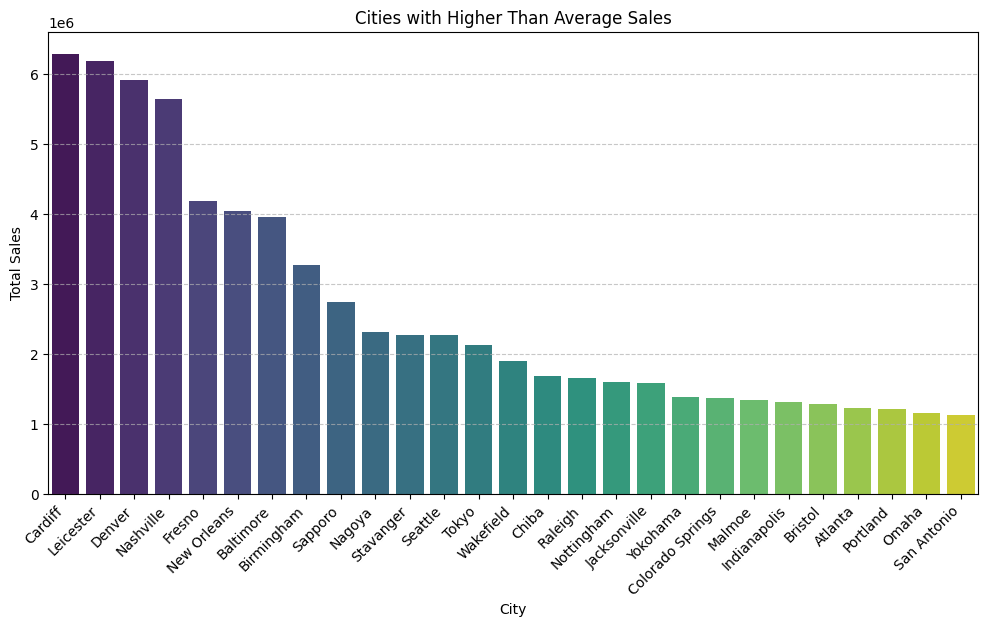

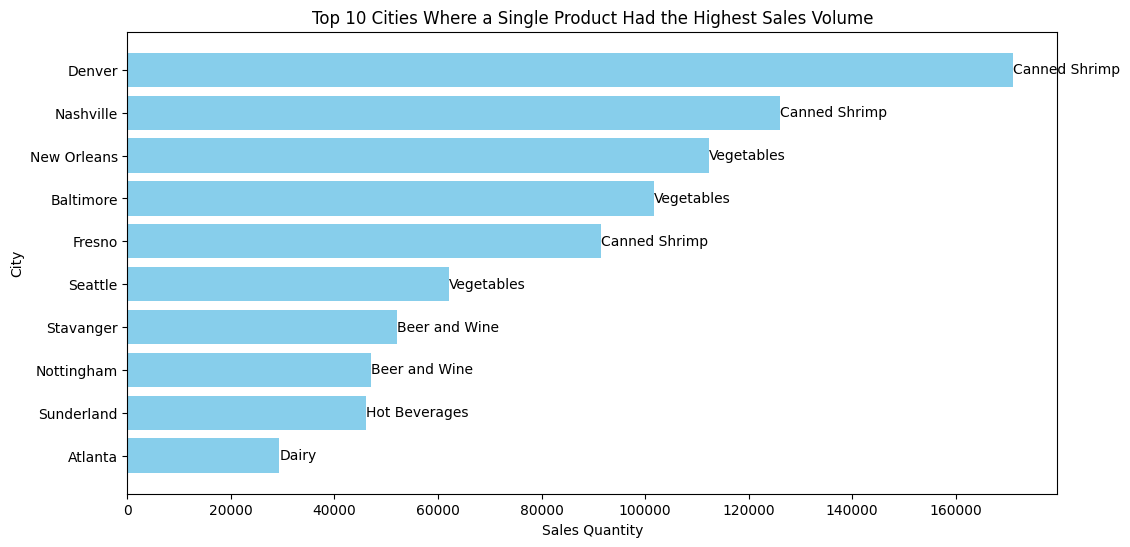

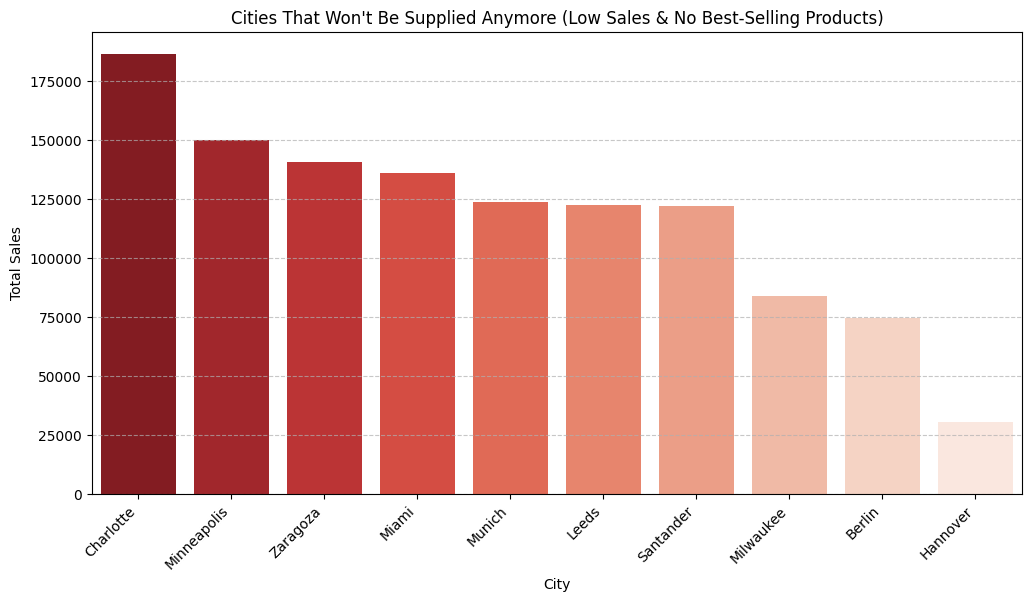

In [47]:
# --- SALES ANALYSIS ---
# Aggregate Sales by City
sales_by_city = sales_final.groupby('City')['Sales'].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by='Sales', ascending=False)

# Aggregate Sales by Product within each City
sales_by_product_city = sales_final.groupby(['City', 'Product Type'])['Sales'].sum().reset_index()

# VISUALIZATION 1: Cities with Higher Than Average Sales
# Calculate average sales across all cities
avg_city_sales = sales_by_city['Sales'].mean()

# Filter cities that have higher than average sales
high_sales_cities = sales_by_city[sales_by_city['Sales'] > avg_city_sales]

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=high_sales_cities, hue='City', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Cities with Higher Than Average Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# VISUALIZATION 2: Top 10 cities with the highest single item sellling Product

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge sales with customer data to get City Code
sales_customers = sales.merge(customers, on="Customer Number", how="left")

# Step 2: Merge with cities data to get City names
sales_customers_cities = sales_customers.merge(cities, on="City Code", how="left")

# Step 3: Merge with item master to get product details
sales_final = sales_customers_cities.merge(item_master, on="Item Number", how="left")

# Step 4: Aggregate total product sales per city (using sales quantity for ranking)
sales_by_product_city = sales_final.groupby(['City', 'Product Type'])['Sales Qty'].sum().reset_index()

# Step 5: Find the highest-selling single product in each city
highest_selling_product_per_city = sales_by_product_city.loc[
    sales_by_product_city.groupby("City")["Sales Qty"].idxmax()
]

# Step 6: Sort by highest single product sale across cities & pick the top 10
top_10_cities = highest_selling_product_per_city.sort_values(by='Sales Qty', ascending=False).head(10)

# Step 7: Visualization using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_10_cities['City'], top_10_cities['Sales Qty'], color='skyblue')

# Adding labels
plt.xlabel('Sales Quantity')
plt.ylabel('City')
plt.title('Top 10 Cities Where a Single Product Had the Highest Sales Volume')

# Annotate with product names
for index, value in enumerate(top_10_cities['Sales Qty']):
    plt.text(value, index, top_10_cities.iloc[index]['Product Type'], va='center', fontsize=10)

# Invert y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

# VISUALIZATION 3: Cities That Won’t Be Supplied Anymore

# Identify cities in first two graphs
cities_high_sales = set(high_sales_cities['City'])
cities_with_high_products = set(high_sales_products['City'])

# Find cities NOT in either category
underperforming_cities = sales_by_city[~sales_by_city['City'].isin(cities_high_sales | cities_with_high_products)]

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=underperforming_cities, hue='City', palette='Reds_r', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Cities That Won't Be Supplied Anymore (Low Sales & No Best-Selling Products)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretation

In [43]:
# --- BUSINESS INSIGHTS ---

print("\n--- Business Insights ---\n")
print("1. Cities with above-average sales should be prioritized for increased marketing and supply efforts, as they represent high-performing markets with strong demand.")
print("2. Key product categories—Canned Shrimp, Vegetables, Beer & Wine, Hot Beverages, and Dairy—dominate sales in specific cities. Targeted advertising for these products should be intensified in their respective high-performing cities.")
print("3. Sunderland, despite being below the average sales threshold, showed significant demand for hot beverages. This presents an opportunity for strategic marketing to boost overall sales in the city.")
print("4. The 10 cities with the lowest total sales and no standout products will be **removed from future supply chains** to optimize distribution efficiency.")
print("5. Cities that did not feature in any of the three key visualizations will continue with standard marketing and supply operations, ensuring balanced distribution without additional investment.")


--- Business Insights ---

1. Cities with above-average sales should be prioritized for increased marketing and supply efforts, as they represent high-performing markets with strong demand.
2. Key product categories—Canned Shrimp, Vegetables, Beer & Wine, Hot Beverages, and Dairy—dominate sales in specific cities. Targeted advertising for these products should be intensified in their respective high-performing cities.
3. Sunderland, despite being below the average sales threshold, showed significant demand for hot beverages. This presents an opportunity for strategic marketing efforts to boost overall sales in the city.
4. The 10 cities with the lowest total sales and no standout products will be **removed from future supply chains** to optimize distribution efficiency.
5. Cities that did not feature in any of the three key visualizations will continue with standard marketing and supply operations, ensuring balanced distribution without additional investment.
